# Navegação e fluxo entre telas

A construção de uma aplicação Android consiste na elaboração de diversas telas, que chamamos de "Activity"

Cada uma destas telas sera responsável por uma funcionalidade do sistema, como login, listar, ver detalhes entre outras funções.

Outro recurso bastante utilizado na construção de IU Android é o uso de "Fragment", que consiste em criar na "Activity" fragmentos de tela, que podem ser reutilizadas em outras telas. Isso torna o desenvolvimento da aplicação mais flexível. 

Os fragmentos podem ser atualizados ou até mesmo substituídos de acordo com a interação do usuário.

Com a utilização do Jetpack Compose, a abordagem que utilizamos é chamada de "Single Acitivity"

# Biblioteca Navigation

Fornece todos os recursos necessário para a navegação entre telas. 

Ocorre através da configuração de rotas, que indicam quais funções devem ser compostas de acordo com algum evento do usuário ou da própria aplicação.

Através do "Navigation" é possivel transportarmos dados de uma tela para outra, além de criarmos efeitos visuais durante a transição entre elas.


## Adicionando a biblioteca do navigation

- Crie um projeto chaamdo "Navegação entre telas" 
- Apague as funções mantendo apenas a classe "MainActivity" e a função "Oncreate()"
- Adicionar uma dependência em Gradle Scripts > build.gradle.kts(Module : app) > Sessão de dependencias > adicionar <code>implementation("androidx.navigation:navigation-compose:2.6.0")</code>

In [ ]:
dependencies {

    implementation("androidx.core:core-ktx:1.12.0")
    implementation("androidx.lifecycle:lifecycle-runtime-ktx:2.7.0")
    implementation("androidx.activity:activity-compose:1.8.2")
    implementation(platform("androidx.compose:compose-bom:2023.08.00"))
    implementation("androidx.compose.ui:ui")
    implementation("androidx.compose.ui:ui-graphics")
    implementation("androidx.compose.ui:ui-tooling-preview")
    implementation("androidx.compose.material3:material3")
    testImplementation("junit:junit:4.13.2")
    androidTestImplementation("androidx.test.ext:junit:1.1.5")
    androidTestImplementation("androidx.test.espresso:espresso-core:3.5.1")
    androidTestImplementation(platform("androidx.compose:compose-bom:2023.08.00"))
    androidTestImplementation("androidx.compose.ui:ui-test-junit4")
    debugImplementation("androidx.compose.ui:ui-tooling")
    debugImplementation("androidx.compose.ui:ui-test-manifest")

//    Dependencia adicionada do Navigation
    implementation("androidx.navigation:navigation-compose:2.6.0")
}

## Criando pasta e arquivos telas

Após isso iremos criar as nossa telas, para isso faremos criaremos uma pasta chamada "screens" dentro da nossa pasta principal, e dentro dela criaremos 4x novas telas do tipo "FILE"  da seguinte maneira:

<center>

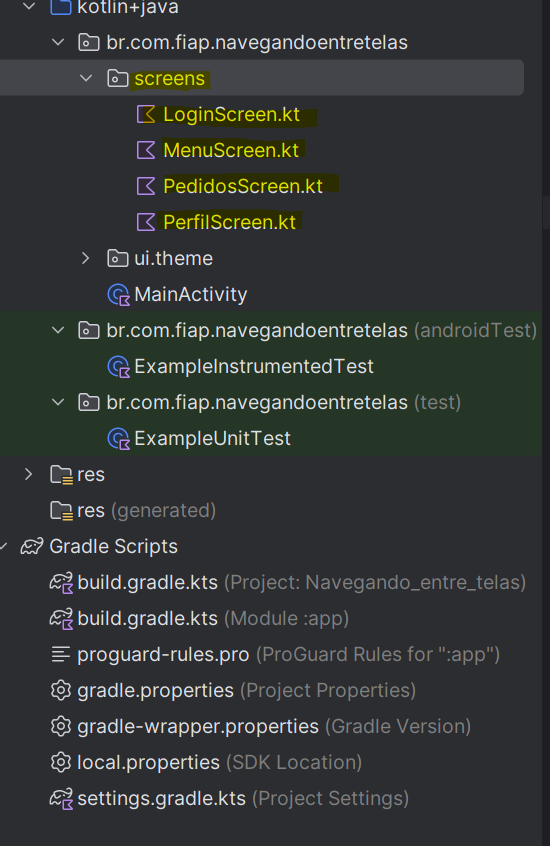

</center>

Na sequencia iremos modelar cada uma das paginas , como por exemplo a pagina loginScreen:

In [ ]:
package br.com.fiap.navegandoentretelas.screens

import androidx.compose.foundation.background
import androidx.compose.foundation.layout.Box
import androidx.compose.foundation.layout.fillMaxSize
import androidx.compose.foundation.layout.padding
import androidx.compose.material3.Button
import androidx.compose.material3.ButtonDefaults
import androidx.compose.material3.Text
import androidx.compose.runtime.Composable
import androidx.compose.ui.Alignment
import androidx.compose.ui.Modifier
import androidx.compose.ui.graphics.Color
import androidx.compose.ui.text.font.FontWeight
import androidx.compose.ui.tooling.preview.Preview
import androidx.compose.ui.unit.dp
import androidx.compose.ui.unit.sp

@Composable
fun LoginScreen() {
    Box(modifier = Modifier
        .fillMaxSize()
        .background(Color(0xFFED145B))
        .padding(32.dp)
    ){
        Text(text = "Login", fontSize = 24.sp, fontWeight = FontWeight.Bold, color = Color.White)
        Button(
            onClick = { /*TODO*/ },
            colors = ButtonDefaults.buttonColors(Color.White),
            modifier = Modifier.align(Alignment.Center)
        ) {
            Text(text = "Entrar", fontSize = 20.sp, color = Color.Magenta)
            
        }
    }
}
@Preview
@Composable
fun LoginScreenPreview(){
    LoginScreen()
}

## Acessando diferentes telas

Para fazer a navegação entre as telas usaremos a biblioteca "Navigation". que tem todas ferramentas para navegar e voltar a ultima tela acessada.

Precisamos seguir alguns passos:

1- Criar uma variavel do tipo val(fixa), que receba o "RememberNavController()", ou seja um variavel que recebe um controle de navegação que se lembra

2- Em seguida chamar um "NavHost(Navcontroller= navController, startDestination = "login")", NavHost, que recebe dois parametros:

- navControlller, que precisa de uma variavel do tipo rememberNavController

- statDestination, que precisa do string que se refere a alguma rota
    
3- Apos isso este mesmo NavHost, abrira uma campo para função, onde sera passado os composable de rota, onde iremos se referenciar a cada tela por uma string e chamar o composable de tal tela.

Exemplo:

In [ ]:
class MainActivity : ComponentActivity() {
    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        setContent {
            NavegandoEntreTelasTheme {
                // A surface container using the 'background' color from the theme
                Surface(
                    modifier = Modifier.fillMaxSize(),
                    color = MaterialTheme.colorScheme.background
                ) {
                    val navController = rememberNavController()
                    NavHost(navController = navController,
                        startDestination = "login"
                    ){
                        composable(route = "login"){
                            LoginScreen()
                        }
                        composable(route = "menu"){
                            MenuScreen()
                        }
                        composable(route = "perfil"){
                            PerfilScreen()
                        }
                        composable(route = "pedidos"){
                            PedidosScreen()
                        }
                    }

                }
            }
        }
    }
}

Feito isso, vamos ao proximo passo, que é dentro do arquivo "LoginScreen", precisamos seguir alguns passos:

4- Comentar o @Previewn no fim da pagina
5- Adicionar um parametro na função:
- navController: NavController
6 - E adicionar a seguinte função ao onClick do Button:
- navControlller.navigate("menu")            

Na qual passara para o navController que ao clicar, o navController, passara a ser "menu", lembrando que o String deve ser o mesmo que se refere a pagina (no arquivo main)

In [ ]:
@Composable
//Adicionar o navController: navController
fun LoginScreen(navController: NavController) {
    Box(modifier = Modifier
        .fillMaxSize()
        .background(Color(0xFFED145B))
        .padding(32.dp)
    ){
        Text(text = "Login", fontSize = 24.sp, fontWeight = FontWeight.Bold, color = Color.White)
        Button(
            onClick = {
                      navController.navigate("menu")
            },
            colors = ButtonDefaults.buttonColors(Color.White),
            modifier = Modifier.align(Alignment.Center)
        ) {
            Text(text = "Entrar", fontSize = 20.sp, color = Color.Magenta)
            
        }
    }
}
//Comentar preview

//@Preview
//@Composable
//fun LoginScreenPreview(){
//    LoginScreen()
//}

5- E para finalizar esta navegação entre estas duas pages, precisamos ir no arquivo main e adicionar o trecho:

- na função LoginScreen, adicionar o parametros navController

In [ ]:
class MainActivity : ComponentActivity() {
    override fun onCreate(savedInstanceState: Bundle?) {
        super.onCreate(savedInstanceState)
        setContent {
            NavegandoEntreTelasTheme {
                // A surface container using the 'background' color from the theme
                Surface(
                    modifier = Modifier.fillMaxSize(),
                    color = MaterialTheme.colorScheme.background
                ) {
                    val navController = rememberNavController()
                    NavHost(navController = navController,
                        startDestination = "login"
                    ){
                        composable(route = "login"){
                            //Adicionamos o navController como parametro da função
                            LoginScreen(navController)
                        }
                        composable(route = "menu"){
                            MenuScreen()
                        }
                        composable(route = "perfil"){
                            PerfilScreen()
                        }
                        composable(route = "pedidos"){
                            PedidosScreen()
                        }
                    }

                }
            }
        }
    }
}

A partir disso vc ja pode navegar entre estas duas pages e usar o callback, que volta para a pagina anterior!

6-  Para fazer a navagação entre as demais, basta seguir o mesmo conceito!

E para pagina sair, basta adicionar na rota "sair" ou "exit" que o programa entenderá da seguinte maneira:

In [ ]:
Button(
    onClick = {
        //adicionar no navigate o sair
        navController.navigate("sair")
              },
    colors = ButtonDefaults.buttonColors(Color.White),
    modifier = Modifier.size(width = 200.dp, height = 48.dp)
) {
    Text(text = "Sair", fontSize = 20.sp, color = Color.Blue)
}

# Parametros obrigatórios

## Passar parâmetros de uma tela para outra

1- Para passar os parametros de uma tela para outra, precisamos editar a route do composable que clicamos

2- Precisamos além de passar a string que se refere a tela um parametro também, no caso parremos o atributo /{nome}

3- Na sequencia criamos o val nome, que recebe it.argument?.getString("nome"), resumindo, cria uma varivel com mesmo nome do atributo que passamos a cima, e pegamos a string que tiver no parametro nome
Além disso, adicionamos o "?" em arguments, pois ele pode ser nulo

4- Depois adicionamos o parametro "nome!!" ao PerfilScreen, ao lado do navController, usamos "!!" para tratar o nulo

In [ ]:
composable(route = "perfil/{nome}"){
    val nome = it.arguments?.getString("nome")  //? pois sabe que pode ser nulo
    PerfilScreen(navController, nome!!)  //double bang, tratam o nulo
}

5 - no arquivo da tela do perfil, adicionamos a função o parametro nome, dizendo que ele é do tipo string

In [ ]:
@Composable
fun PerfilScreen(
    navController:NavController,
    nome: String
)

6- No botão que referencia o perfil, adicionamos o nome que desejamos dar ao parametro no "navControlller.navigate("perfil/maria")"

In [ ]:
Button(
    onClick = {
              navController.navigate("perfil/Maria")   //Adicionando o argumento da rota
    },
    colors = ButtonDefaults.buttonColors(Color.White),
    modifier = Modifier.size(width = 200.dp, height = 48.dp)
) {
    Text(text = "Perfil", fontSize = 20.sp, color = Color.Blue)
}

# Parametros opcionais entre telas

## Como tornar um parametro opcional

Para compartilhar um parametro opcional, precisamos:

1- Ir <b>no arquivo main</b>, no composable que desejamos passar o parametro

2- Adicionar na route, o "?" pois pode ser vazio, seguido do nome do nomeParametro e recebendo o {pnomeParametro}

3- Apos isso criar um arguments, que receba um listOf(navArgumen(name="nomeParametro"))

4- Abrindo {} do listOf, passamos o defaultValue, com o valor que desejarmos

5- E na função do composable, adicionar o parametro "(navController,it.arguments?getString("cliente"))", que significa, navegador de controle, o argumento pode ser nulo, tente pegar a o parametro x

In [ ]:
composable(
    route = "pedidos?cliente={cliente}",      //na rota pedido, passasmos argumento cliente
    arguments = listOf(navArgument(name = "cliente"){//pegamos os argumentos guardados e passamos o nome do argumento que queremos recuperar
    defaultValue = "Sem cliente" //caso não encontre deixamos um valor padrão
})
)
{
    PedidosScreen(navController,it.arguments?.getString("cliente")!!)
}

Ja <b>no arquivo Menu</b> que tem o botão de acesso a proxima pagina,

6- Adicionar no navigate da função onClick o parametro ("nomeTela?nomeParametro = ValorQualquer")

In [ ]:
Button(
    onClick = {
        navController.navigate("pedidos?numero=5656")
              },
    colors = ButtonDefaults.buttonColors(Color.White),
    modifier = Modifier.size(width = 200.dp, height = 48.dp)
) {
    Text(text = "Pedidos", fontSize = 20.sp, color = Color.Blue)
}

7- Por fim <b>na pagina pedidos</b>, vamos alterar simplesmente o texto, para receber o parametro em forma de texto

In [ ]:
Text(
    text = "Pedidos - $cliente",             //aqui adicionamos o parametro
    fontSize = 20.sp,
    color = Color.White
)

## Compartilhando multiplos atributos

Para isso precisamos alterar diversos campos, entre eles o <b>arquivo MainActivity.kt</b>, indo até o composable que desejamos carregar os atributos e passando o seguinte:

In [ ]:
composable(
    //adicionando /{idade}
    route = "perfil/{nome}/{idade}",
    //agora passando mais de um NavArgument no listOf, apenas os separando por virgular
    arguments = listOf(

        //primeiro nav
        navArgument(name = "nome") {
            type = NavType.StringType
        },

        //segundo nav
        navArgument(name = "idade") {
            type = NavType.IntType
        }
    )
) {
    //criando variaveis
    val nome = it.arguments?.getString("nome")
    val idade = it.arguments?.getInt("idade")

    //as adicionando no composable
    PerfilScreen(navController, nome!!, idade!!)
}

Na sequência iremos no <b>arquivo MenuScreen.kt</b>, onde esta o botão que chama o perfil e carregar o valor no navigate:

In [ ]:
Button(
    onClick = {
              navController.navigate("perfil/Maria/32")   //Adicionando o argumento idade (32)
    },
    colors = ButtonDefaults.buttonColors(Color.White),
    modifier = Modifier.size(width = 200.dp, height = 48.dp)
) {
    Text(text = "Perfil", fontSize = 20.sp, color = Color.Blue)
}

# Animação entre transições de telas

Para este feito, vamos precisar da ajuda de um import no Gradle Scripts> build.gradle(Modulo:app), na parte de dependencias e adicionar o seguinte code:

- Ahhh! e não esquece do Sync Now

- Na aba build (martelinho), vc pode checkar se apos o Sync Now, se ocorreu algum erro ou se está tudo certo

- Não precisa mudar o navController para rememberAnimatedNavController e nem o NavHost (como o professor havia pedido)

In [ ]:
//    Implementacao de transicoes
implementation("com.google.accompanist:accompanist-navigation-animation:0.30.1")

Para adicionar a transition, no NavHost, temos o startDestination que está em "login" , além deste temos varios outros como:

## ExitTransition - Transição de saída da tela

- exitTransition, que passa a maneira que sera feita a saida da pagina de inumeras formas:
    - slideOutOfContainer, que desliza para fora do container
    - slideOut, que desliza para fora
    - slideOutHorizontally, que desliza para fora horizontalmente
    - slideOutVertically, que desliza para fora verticalmente

    Todos estes a cima, pedem um towards, que pede o escopo e direção da saída


In [ ]:
NavHost(
    navController = navController,
    startDestination = "login",

    //ExitTransition
    exitTransition = {
        //DeslizaParaForaDoContainer
        slideOutOfContainer(
            //Deslizar para o começo
            towards = AnimatedContentTransitionScope.SlideDirection.Start
            )
    }

## EnterTransition - Transição de entrada da tela

- exitTransition, que passa a maneira que sera feita a saida da pagina de inumeras formas:
    - slideIntoContainer, que desliza para dentro da proxima tela
    - slideInto, que desliza para dentro
  

    Todos estes a cima, pedem um towards, que pede o escopo e direção da saída

In [ ]:
NavHost(
    navController = navController,
    startDestination = "login",
    //Adiciondo transição ao entrar na tela
    enterTransition = {
        slideIntoContainer(
            towards = AnimatedContentTransitionScope.SlideDirection.Down
        )
    }

### Adicionando tempo de transição

Seja na sáida ou entrada da tela, podemos adicionar tempo a transição usando AnimationSpec!

Além de decidir o formato de transição, podemos também definir o tempo de transição em milisegundos, adicionando o parametro <b>animationSpec = tween(x)</b> no SlideOutOfContainer(ou outro), da seguinte maneira:

In [ ]:
NavHost(
    navController = navController,
    startDestination = "login",
    exitTransition = {
        slideOutOfContainer(
            towards = AnimatedContentTransitionScope.SlideDirection.Start,
            //passando tempo de transição
            animationSpec = tween(1000)
            )
    }

# Combinar animações - Não so de deslize vive a animação

Além de deslizar e definir tempo de saida e entrada de uma tela, podemos também adicionar opacidade na saída ou entrada de uma tela, para isso adicionamos "+" mais uma animação em nosso slideOutOfContainer ou slideIntoContainer, o <b>fadeIn ou fadeOut</b>.

- Lembre-se de adicionar o sinal de "+" para adicionar uma animação além do deslize

- fadeIn, pede um animationSpec como parametro, seguido de um tween com o tempo, e define o tempo de surgimento (100% opacidade)

- fadeOu, pede um animationSpec como parametro, seguido de um tween com o tempo, e define o tempo de desaparecimento (0% opacidade)

In [ ]:
NavHost(
    navController = navController,
    startDestination = "login",
    exitTransition = {
        slideOutOfContainer(
            towards = AnimatedContentTransitionScope.SlideDirection.Start,
            animationSpec = tween(2000)
            ) + fadeOut(animationSpec = tween(2000))          //note o sinal de + seguido do fadeOut
    },
    enterTransition = {
        slideIntoContainer(
            towards = AnimatedContentTransitionScope.SlideDirection.Down,
            animationSpec = tween(2000)
        ) + fadeIn(animationSpec = tween(2000))              //note o sinal de + seguido do fadeIn
    }

)

# Atalhos do Android Studio

|Atalho | Função|
|-------|-------|
| Ctrl + Alt + L | Organiza a identação|

